# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


In [ ]:
!pip list


In [10]:
import tensorflow as tf
import os


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr
import os
import shutil
import pandas as pd


In [5]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/MURA-v1.1.zip


In [12]:
if (os.path.exists("Mura")):
    # !rm -rf Mura
    shutil.rmtree("Mura")
else:
    os.mkdir("Mura")
    os.mkdir("Mura/train")
    os.mkdir("Mura/valid")

train = pd.read_csv("./Train_set.csv")
valid = pd.read_csv("./Valid_set.csv")

for i in range(len(train)):
    train_path = train.iloc[i, 0]
    file_name = train_path.split("/")[-1]
    if (train.iloc[i, 1] == 1):

        if (os.path.exists("Mura/train/positive")):
            pass
        else:
            os.makedirs("Mura/train/positive")
        shutil.copy(train_path, f"Mura/train/positive/{i}-{file_name}")
    else:
        if (os.path.exists("Mura/train/negative")):
            pass
        else:
            os.makedirs("Mura/train/negative")
        shutil.copy(train_path, f"Mura/train/negative/{i}-{file_name}")
for i in range(len(valid)):
    valid_path = valid.iloc[i, 0]
    file_name = valid_path.split("/")[-1]

    if (valid.iloc[i, 1] == 1):
        if (os.path.exists("Mura/valid/positive")):
            pass
        else:
            os.makedirs("Mura/valid/positive")
        shutil.copy(valid_path, f"Mura/valid/positive/{i}-{file_name}")
    else:
        if (os.path.exists("Mura/valid/negative")):
            pass
        else:
            os.makedirs("Mura/valid/negative")
        shutil.copy(valid_path, f"Mura/valid/negative/{i}-{file_name}")


In [14]:
data_dir = 'Mura'


In [15]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Issue with image Mura/valid/positive
Issue with image Mura/valid/negative
Issue with image Mura/train/positive
Issue with image Mura/train/negative


# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt


In [6]:
data = tf.keras.utils.image_dataset_from_directory('Mura')


Found 40005 files belonging to 2 classes.


2023-10-11 13:21:38.017154: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-11 13:21:38.017190: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-11 13:21:38.017195: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-11 13:21:38.017462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-11 13:21:38.017851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
data_val = tf.keras.utils.image_dataset_from_directory('Mura/valid')


Found 3197 files belonging to 2 classes.


In [28]:
data_iterator = data.as_numpy_iterator()


In [29]:
batch = data_iterator.next()


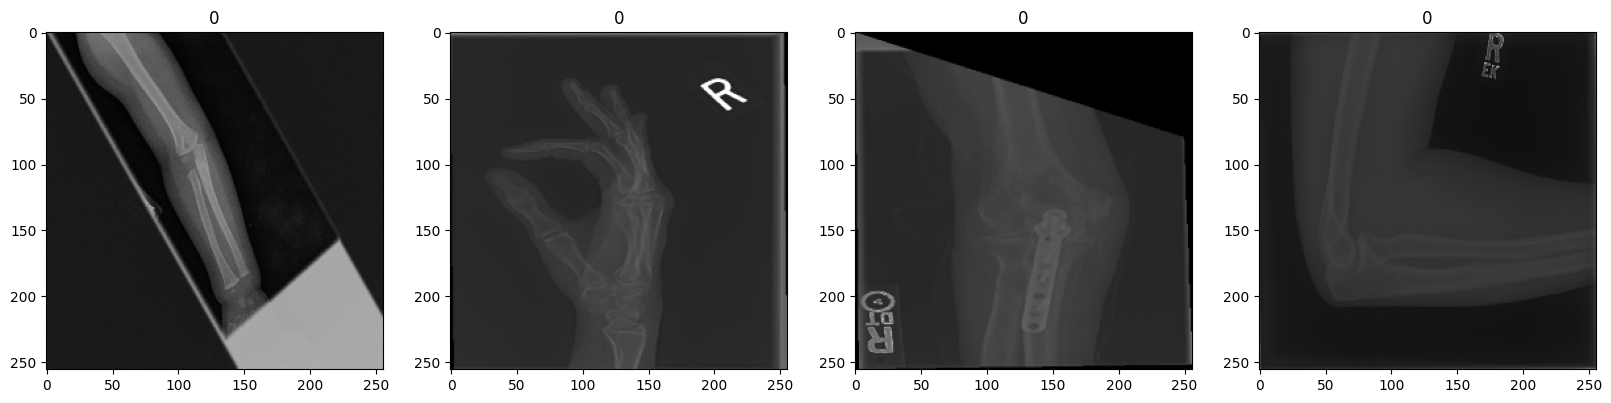

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# 4. Scale Data

In [8]:
data = data.map(lambda x,y: (x/255, y))


In [9]:
data.as_numpy_iterator().next()


(array([[[[0.23921569, 0.23921569, 0.23921569],
          [0.23765318, 0.23765318, 0.23765318],
          [0.23920037, 0.23920037, 0.23920037],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.23751532, 0.23751532, 0.23751532],
          [0.24155943, 0.24155943, 0.24155943],
          [0.25160846, 0.25160846, 0.25160846],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.23895527, 0.23895527, 0.23895527],
          [0.2419424 , 0.2419424 , 0.2419424 ],
          [0.25292584, 0.25292584, 0.25292584],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [10]:
len(data)


1251

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [12]:
train_size


875

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [16]:
len(train),len(val),test


(875,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# 6. Build Deep Learning Model

In [37]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [31]:
cnn = Sequential()


In [33]:
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [34]:
cnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)       

# 7. Train

In [48]:
logdir='logs'
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]


In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [51]:
# hist = cnn.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
hist = cnn.fit(train,epochs=5, validation_data=val, callbacks=callbacks_list)


Epoch 1/5
875/875 [==============================] - 241s 275ms/step - loss: 0.2836 - accuracy: 0.9182 - val_loss: 0.2667 - val_accuracy: 0.9249 - lr: 0.0010
Epoch 2/5
875/875 [==============================] - 239s 272ms/step - loss: 0.2842 - accuracy: 0.9179 - val_loss: 0.2677 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 3/5
875/875 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.9181
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
875/875 [==============================] - 233s 266ms/step - loss: 0.2837 - accuracy: 0.9181 - val_loss: 0.2668 - val_accuracy: 0.9249 - lr: 0.0010
Epoch 4/5
875/875 [==============================] - 225s 256ms/step - loss: 0.2833 - accuracy: 0.9182 - val_loss: 0.2681 - val_accuracy: 0.9244 - lr: 3.0000e-04


# 8. Plot Performance

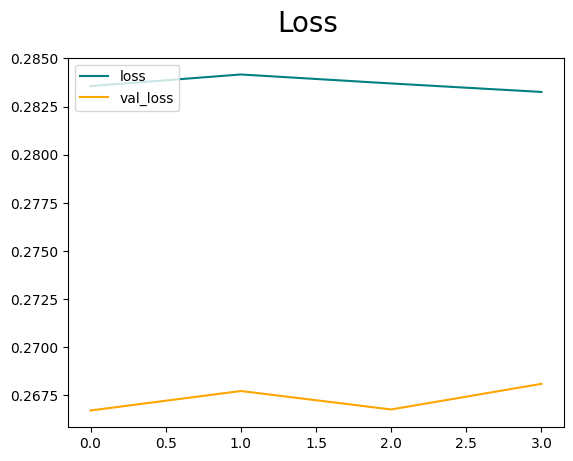

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


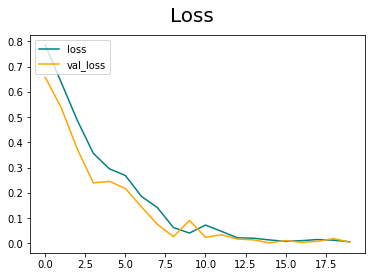

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


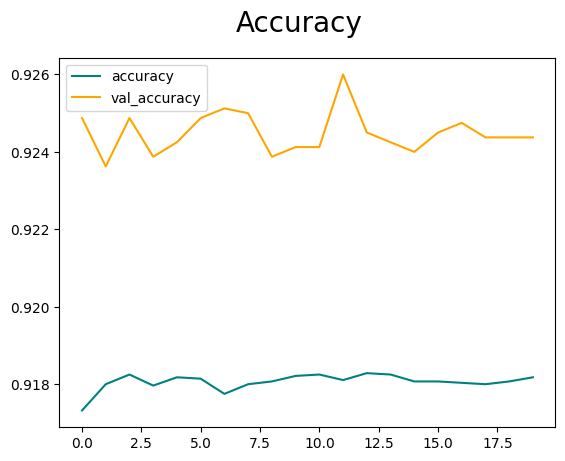

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [5]:
import cv2


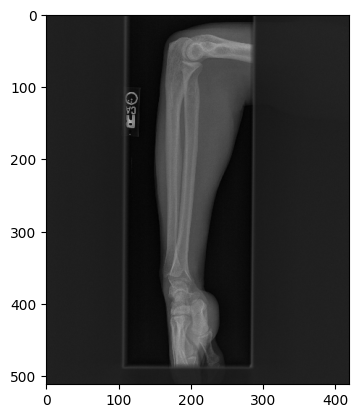

In [8]:
img = cv2.imread('MURA-v1.1/valid/XR_FOREARM/patient11450/study1_negative/image1.png')
plt.imshow(img)
plt.show()


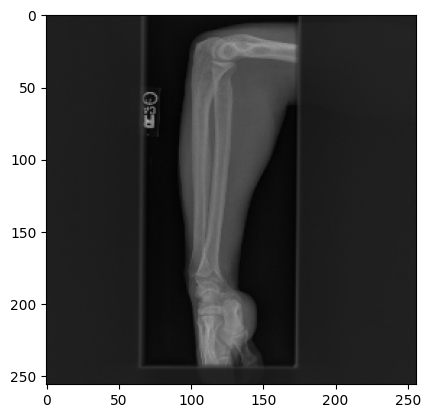

In [11]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 25ms/step


In [55]:
predictions = yhat.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1


In [56]:
if predictions > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [57]:
predictions


array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

# 11. Save the Model

In [1]:
from tensorflow.keras.models import load_model


In [2]:
model.save(os.path.join('models','imageclassifier.h5'))


NameError: name 'model' is not defined

In [14]:
new_model = load_model('imageclassifier.h5')


In [15]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 1s 500ms/step


array([[0.]], dtype=float32)

In [2]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")


tensor([1.], device='mps:0')


In [ ]:
torch.load("pytorch_model.bin")


In [1]:
from PIL import Image
import torchvision.transforms as transforms


In [25]:
image = Image.open("MURA-v1.1/valid/XR_FOREARM/patient11450/study1_negative/image1.png")
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the model's input size
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


In [31]:
from transformers import ViTFeatureExtractor, ViTForImageClassification


In [32]:
# Create the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k")


/Users/rahulyadav/Documents/Projects/DS-project/env/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
checkpoint = torch.load('pytorch_model.bin', map_location=torch.device('mps'))

# Extract the model
# my_model = checkpoint['model']  # 'model' should be the key in the dictionary

# # Put the model in evaluation mode
# my_model.eval()


In [34]:
# Load the model's state_dict from the checkpoint
model.load_state_dict(checkpoint)

# Put the model in evaluation mode
model.eval()


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [36]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)  # Replace input_batch with your preprocessed image


In [38]:
import torch.nn.functional as F

# Apply softmax to obtain class probabilities
probabilities = F.softmax(output.logits, dim=1)


In [40]:
threshold = 0.5  # You can adjust this threshold
predicted_class = (probabilities[:, 1] > threshold).int()  # Classify as 1 if the probability of the positive class is above the threshold


In [42]:
predicted_class


tensor([1], dtype=torch.int32)